$\underline{\text{Imports:}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$\underline{\text{Problem setting: the codiagonalisable case:}}$


we define an Optimal Execution Problem in which the agent minimizes the mean distance between the value of its book before trading, at time $t_0 = 0$, and the total value of its book at the end of the trading sequence at time $t_N = T$.

We define the expected shortfall
\begin{equation}
ES(\xi) = \mathbb{E}[IS(\xi)] := \mathbb{E}\left[\sum_{k=1}^N \tilde{S}_{t_k} \xi_{t_k} - Q^T S_0\right]
\end{equation}
where $IS$ is the implemented shortfall and $Q = (Q_1, \ldots, Q_d)$ is the liquidation objective vector. The Optimal Execution Problem consists of minimizing $ES$ under the constraint of liquidating the portfolio before time $T$.
\begin{equation}
\arg \min_{\xi \in \mathcal{A}} \{ES(\xi)\}
\end{equation}
where $\mathcal{A} := \{\pmb{\xi} = (\xi_1, \ldots, \xi_N) \in (\mathbb{R}^d)^N \, \text{s.t } \, \pmb{\xi}^T \pmb{1} = Q \}$.

Rewriting the Expected Shortfall and applying Jensen's inequality, the Optimal Execution Problem associated with the price impact model defined in the previous subsection consists of a quadratic minimization problem defined by
\begin{equation}
\arg \min_{\xi \in \mathcal{A}} \left\{\frac{1}{2} \xi^T M_N \xi\right\}
\end{equation}
where
$$
M =
\begin{pmatrix}
\Xi_1 & \Theta_1 & \cdots & \Theta_1 \\
\Theta_1 & \Xi_2 & \Theta_2 & \cdots \\
\vdots & \Theta_2 & \ddots & \Theta_{N-1} \\
\Theta_1 & \cdots & \Theta_{N-1} & \Xi_N
\end{pmatrix}
$$
and
$$
\Theta_k =
\begin{pmatrix}
\theta_{1k} & \gamma_{1,2k} & \cdots & \gamma_{1,dk} \\
\gamma_{1,2k} & \theta_{2k} & \gamma_{2,3k} & \cdots \\
\vdots & \gamma_{2,3k} & \ddots & \gamma_{N-1,Nk} \\
\gamma_{1,dk} & \cdots & \gamma_{N-1,Nk} & \theta_{dk}
\end{pmatrix}
,
\Xi_k =
\begin{pmatrix}
\eta_{1k} & \rho_{1,2k} & \cdots & \rho_{1,dk} \\
\rho_{1,2k} & \eta_{2k} & \rho_{2,3k} & \cdots \\
\vdots & \rho_{2,3k} & \ddots & \rho_{N-1,Nk} \\
\rho_{1,dk} & \cdots & \rho_{N-1,Nk} & \eta_{dk}
\end{pmatrix}
$$
Note that $\theta_k$ and $\eta_k$ are respectively the permanent and temporary impact parameters at time $t_k$ for each of the $d$ assets. $\gamma_{i,jk}$ is the permanent cross impact parameter between the $i$-th asset and the $j$-th asset at time $t_k$, while $\rho_{i,jk}$ is the temporary cross impact parameter between the $i$-th asset and the $j$-th asset at time $t_k$.

$\underline{\text{Weak well-posedness:}}$

$$
\tilde{M}_i :=
\begin{pmatrix}
\lambda^B_{i1} & \lambda^A_{i1} & \cdots & \lambda^A_{i1} \\
\lambda^A_{i1} & \lambda^B_{i2} & \lambda^A_{i2} & \cdots \\
\vdots & \lambda^A_{i2} & \ddots & \lambda^A_{i(N-1)} \\
\lambda^A_{i1} & \lambda^A_{i2} & \cdots & \lambda^B_{iN}
\end{pmatrix}
$$

We want to generate eigenvlues' dynamics $\lambda(A)$ and $\lambda(B)$ such that $\tilde{M}$ is always a B-matrix. 

$\underline{\text{(Dynamic) B-matrix generation:}}$

Following what we proposed for the one-dim model we assume cross-impact eigenvalues to be exponentially decreasing. Parametrizing $\lambda_{i,j}^{A}$ and $\lambda_{i,j}^{B}$ as follows
$$
\lambda_{ij}^{A} = A_{i}e^{-a_{i}\frac{j}{N}}\text{, } \lambda_{ij}^{B} = B_{i}e^{-b_{i}\frac{j}{N}}
$$
In our framework $i$ accounts for the asset, and $j$ for the time index. 

Hence $\tilde{M}_i$ is a B-matrix iff $B_i,A_i,b_i,a_i$ are such that 

$$
    \left(B_ie^{-b_i \frac{j}{N}} + (N-j)A_ie^{-a_i\frac{j}{N}} + \sum_{k=1}^{j-1}A_ie^{-a_i\frac{k}{N}}\right) > N \max \{A_ie^{-a_i \frac{k}{N}}, \text{ } 1\le k \le j\}
$$

The previous inequality can be written as follows 
$$
\left( \frac{B_i}{A_i}e^{-b_i \frac{j}{N}} + (N-j)e^{-a_i\frac{j}{N}} + \sum_{k=1}^{j-1}e^{-a_i\frac{k}{N}}\right) > N e^{- \frac{a_i}{N}}
$$

Or equivalently

$$
\left( \frac{B_i}{A_i}e^{-b_i \frac{j}{N}} + (N-j)e^{-a_i\frac{j}{N}} + \frac{e^{-\frac{a_i}{N}}-e^{-\frac{ja_i}{N}}}{1-e^{-\frac{a_i}{N}}}\right) > N e^{- \frac{a_i}{N}}
$$


---

We study the boundary cases:

- $\underline{\text{For } j=1}$: The B-matrix inequality is equivalent to
    $$
        \frac{B_i}{A_i} > e^{-\frac{(a_i-b_i)}{N}}
    $$
    For large $N$ or $a_i=b_i$ we obtain $B_i > A_i$ is a sufficient condition. 
- $\underline{\text{For } j=N}$: The B-matrix inequality becomes
    $$
        \frac{B_i}{A_i}e^{-b_i} + \frac{e^{-a_i/N} - e^{-a_1}}{1-e^{-a_i/N}} > N e^{-a_i/N}
    $$
    For small $a_i$ we obtain 
    $$
        \frac{B_i}{A_i} > e^{b_i}
    $$
    is a sufficient condition. 

Now assume $\frac{B_i}{A_i} > e^{b_i}$ we have that a sufficient conditions for the B-matrix to hold is

$$
    \left( e^{-b_i \frac{j-1}{N}} + (N-j)e^{-a_i\frac{j}{N}} + \frac{e^{-\frac{a_i}{N}}-e^{-\frac{ja_i}{N}}}{1-e^{-\frac{a_i}{N}}}\right) > N e^{- \frac{a_i}{N}}
$$

For $j=N$ and small $a_i < 1$ and large $N$, we the sufficient condition 

$$
    b_i < - \log(1-a_i)
$$

If $N$ large and $a_i > 1$ there are no conditions on $b_i$, the inequality is always verified. 

---

To analyze the inequality for intermediate values of \(j\), consider the general form:

$$
e^{-b_i \frac{j-1}{N}} + (N-j)e^{-a_i\frac{j}{N}} + \frac{e^{-\frac{a_i}{N}} - e^{-\frac{ja_i}{N}}}{1 - e^{-\frac{a_i}{N}}} > N e^{-\frac{a_i}{N}},
$$
where $1 \leq j \leq N$.

For intermediate $j$, the terms can be grouped and analyzed as follows:

1. **First Term: $e^{-b_i \frac{j-1}{N}}$:**  
   Since $b_i \geq 0$, the term $e^{-b_i \frac{j-1}{N}}$ decreases as $j$ increases. However, for sufficiently small $b_i$, this term decays slowly enough to provide a significant contribution across all values of $j$. Specifically, if $b_i$ satisfies $b_i \leq -\ln(1 - a_i)$ (for $0 < a_i < 1$), this term is guaranteed to remain large enough to contribute positively to the inequality.

2. **Second Term: $(N-j)e^{-a_i \frac{j}{N}}$:**  
   The term $(N-j)e^{-a_i \frac{j}{N}}$ balances two competing factors:
   - $(N-j)$, which decreases linearly as $j$ increases.
   - $e^{-a_i \frac{j}{N}}$, which decreases exponentially as $j$ increases.

   The product of these terms ensures a non-trivial contribution to the inequality, particularly for small-to-moderate values of $j$. For large $j$, this term approaches zero, but its decay is compensated by the summation term (discussed next).

3. **Third Term: $\frac{e^{-\frac{a_i}{N}} - e^{-\frac{j a_i}{N}}}{1 - e^{-\frac{a_i}{N}}}$:**  
   This term can be rewritten as a finite geometric sum:
   $$
   \frac{e^{-\frac{a_i}{N}} - e^{-\frac{j a_i}{N}}}{1 - e^{-\frac{a_i}{N}}} = \sum_{k=1}^{j-1} e^{-k \frac{a_i}{N}}.
   $$
   For $a_i > 0$, $e^{-k \frac{a_i}{N}}$ decays slowly for small $a_i$, ensuring that the summation grows with $j$. For large $j$, this term dominates because the summation accumulates contributions over multiple terms.

4. **Right-Hand Side: $N e^{-\frac{a_i}{N}}$:**  
   On the right-hand side, \(N e^{-\frac{a_i}{N}}\) is approximately:
   $$
   N e^{-\frac{a_i}{N}} \approx N \left(1 - \frac{a_i}{N}\right) = N - a_i,
   $$
   for small $a_i$. This shows that the right-hand side decreases linearly with \(a_i\).

**Sufficient Condition for Intermediate Values of $j$:**
To ensure the inequality holds for all intermediate $j$, the following observations are important:
- For $0 < a_i < 1$, ensuring $b_i \leq -\ln(1 - a_i)$ slows the decay of $e^{-b_i \frac{j-1}{N}}$, maintaining its significance across all \(j\).
- For $a_i \geq 1$, the rapid decay of $e^{-a_i \frac{j}{N}}$ ensures the second and third terms remain sufficient to satisfy the inequality, making additional constraints on $b_i$ unnecessary.

By combining these results, the inequality is satisfied across all $j$.

$\underline{\text{Matrix generation:}}$

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class CrossImpactExecutionProblemEncoding:
    """
    Class to encode cross-impact execution problems.

    Attributes:
        N (int): Number of trading times.
        M (int): Number of assets.
    """

    def __init__(self, N: int, M: int, a_bound: float=1.):
        """
        Initialize with number of trading times and assets.

        Args:
            N (int): Number of trading times.
            M (int): Number of assets.
        """
        self.N = N
        self.M = M
        self.a_bound = a_bound
        self.coefficients = None

    def generate_coeffs(self) -> dict:
        """
        Generate coefficients for the cross-impact execution problem.

        Returns:
            dict: Generated coefficients containing:
                - a_i: Positive coefficients (0 < a_i < 1, size M).
                - b_i: Non-negative coefficients satisfying b_i < -log(1 - a_i) (size M).
                - A_i: Positive coefficients (size M).
                - B_i: Positive coefficients ensuring B_i / A_i > exp(b_i).
        """
        assert self.a_bound in [1., 2.], "a_bound should be either 1. or 2."
        if self.a_bound == 1.:
            # Generate a_i (positive values in range (0.0, 1.0))
            a_i = np.random.uniform(0.0, self.a_bound, size=self.M)

            # Generate b_i satisfying the condition 0 <= b_i < -log(1 - a_i)
            max_b_i = -np.log(1 - a_i)  # Maximum b_i values
            b_i = np.random.uniform(0.0, max_b_i)
        else: 
            # Generate a_i (positive values in range (0.0, 1.0))
            a_i = np.random.uniform(self.a_bound, 2. , size=self.M)

            # Generate b_i without any constraint
            b_i = np.random.uniform(0.0, 2., size=self.M)

        # Generate A_i (positive values in range [1.0, 10.0])
        A_i = np.random.uniform(0., 1.0, size=self.M)

        # Generate B_i ensuring the condition B_i / A_i > exp(b_i)
        B_i = A_i * np.exp(b_i) * np.random.uniform(1., 1.1, size=self.M)

        # Store coefficients for further computations
        self.coefficients = {
            "a_i": a_i,
            "b_i": b_i,
            "A_i": A_i,
            "B_i": B_i,
        }
        return self.coefficients

    def compute_lambdas(self) -> dict:
        """
        Compute lambda values for the coefficients.

        Returns:
            dict: Lambda values containing:
                - lambda_A: Values for lambda_ij^A for all i, j.
                - lambda_B: Values for lambda_ij^B for all i, j.
        """
        if self.coefficients is None:
            raise ValueError("Coefficients not generated. Run generate_coeffs() first.")

        a_i = self.coefficients["a_i"]
        b_i = self.coefficients["b_i"]
        A_i = self.coefficients["A_i"]
        B_i = self.coefficients["B_i"]

        time_points = np.linspace(0, 1, self.N)  # j/N for time in range [0, 1]

        lambda_A = np.array([
            [A_i[i] * np.exp(-a_i[i] * t) for t in time_points] for i in range(self.M)
        ])
        lambda_B = np.array([
            [B_i[i] * np.exp(-b_i[i] * t) for t in time_points] for i in range(self.M)
        ])

        return {"lambda_A": lambda_A, "lambda_B": lambda_B, "time_points": time_points}

    def plot_lambdas(self, lambdas: dict):
        """
        Plot lambda values over time.

        Args:
            lambdas (dict): Dictionary containing lambda_A, lambda_B, and time_points.
        """
        time_points = lambdas["time_points"]
        lambda_A = lambdas["lambda_A"]
        lambda_B = lambdas["lambda_B"]

        fig, axes = plt.subplots(self.M, 1, figsize=(12, 6))
        for i in range(self.M):
            axes[i].plot(time_points, lambda_A[i], label=f"λ_A (Asset {i + 1})", linestyle='-')
            axes[i].plot(time_points, lambda_B[i], label=f"λ_B (Asset {i + 1})", linestyle='--')

            axes[i].set_title("Lambda Values Over Time")
            axes[i].set_xlabel("Time (j/N)")
            axes[i].set_ylabel("Lambda Values")
            axes[i].legend()
            axes[i].grid()
        plt.show()

    def generate_orthonormal_basis(self):
        """
        Generate a unique orthonormal basis for R^M.
        """
        random_matrix = np.random.rand(self.M, self.M)
        Q, _ = np.linalg.qr(random_matrix)  # QR decomposition to generate orthonormal basis
        self.orthonormal_basis = Q
        return Q

    def generate_matrices_with_eigenvalues(self, lambdas: dict, key: str) -> list:
        """
        Generate N matrices with the given eigenvalues (lambda_A or lambda_B).

        Args:
            lambdas (dict): Lambda values containing eigenvalues for each time step.
            key (str): The key ('lambda_A' or 'lambda_B') specifying which eigenvalues to use.

        Returns:
            list: List of N matrices with the specified eigenvalues.
        """
        if self.orthonormal_basis is None:
            raise ValueError("Orthonormal basis not generated. Run generate_orthonormal_basis() first.")

        eigenvalues = lambdas[key]
        matrices = []
        Q = self.orthonormal_basis

        for j in range(self.N):
            D = np.diag(eigenvalues[:, j])  # Diagonal matrix with eigenvalues
            matrix = Q @ D @ Q.T  # Symmetric matrix with specified eigenvalues
            matrices.append(matrix)

        return matrices


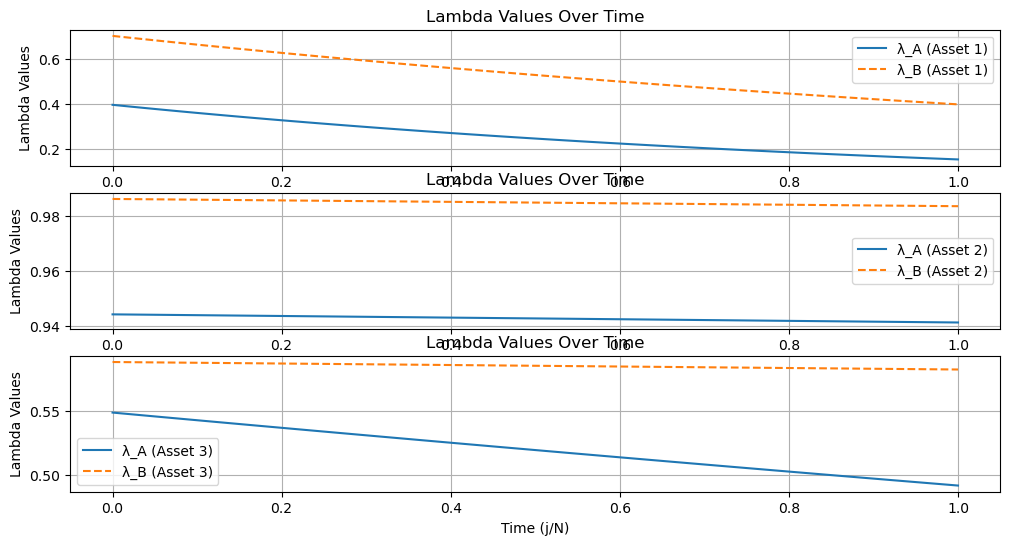

In [36]:
# Initialize the encoding with number of trading times (N) and assets (M)
encoding = CrossImpactExecutionProblemEncoding(N=100, M=3, a_bound=1.)

# Generate coefficients
coefficients = encoding.generate_coeffs()

# Compute lambda values
lambdas = encoding.compute_lambdas()

# Plot lambda values over time
encoding.plot_lambdas(lambdas)

In [37]:
# Generate orthonormal basis
orthonormal_basis = encoding.generate_orthonormal_basis()

# Generate matrices with eigenvalues
matrices_A = encoding.generate_matrices_with_eigenvalues(lambdas, key="lambda_A")
matrices_B = encoding.generate_matrices_with_eigenvalues(lambdas, key="lambda_B")


$\underline{\text{Remark:}}$ We proposed a class of time-varying matrices, with decreasing eigenvalues such that the optimal execution problem is weakly well posed, ie it has a unique solution and the optimal execution problem is a minimization problem. 

This construction is based on the generation of the eigenvalues. In particular we did not explicited a differential equation for the cross impact matrices that ensures the B-matrix property with decreasingness of the eigenvalues. 

Our deep learning approach with Kalman Filter assumes a linear state equation for the impact matrices

$$
    X_{t+1} = A X_{t} + \text{exogenous terms}
$$

--- 

In our context we  have $X_t = UD_tU^T$ with $U \in \mathbb{O}_{M}(\mathbb{R})$. and $D_t = diag(\lambda_{i,t})$.

A simple way to rewrite the endogenous equation as the discrete time version of a differential equation that satisfies the previous conditions is that A has also the same basis of orthonormalization of X... This is a very strong and non acceptable assumption for real life impact dynamics, but for sake of simplicity and for testing our computational approach we will consider this very hypothetic setting. 